## Регуляризация L2
$$L_2 = ||\omega||^2_2 = \sum_{j=1}^m\omega^2_j$$
<img src="./L2.png" width="600"/>
## Регуляризация L1
$$L_1 = ||\omega||_1 = \sum_{j=1}^m|\omega_j|$$
<img src="./L1.png" width="600"/>

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd


df = pd.read_csv('../data/wine/wine.data', header=None)
df.columns = [
    'Label',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315',
    'Proline',
]

X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

In [12]:
lr = LogisticRegression(penalty='l1', C=.1)
lr.fit(X_train_std, y_train)
print('Точность на тренировочном наборе: ', lr.score(X_train_std, y_train))
print('Точность на тестовом наборе: ', lr.score(X_test_std, y_test))

Точность на тренировочном наборе:  0.983870967742
Точность на тестовом наборе:  0.981481481481


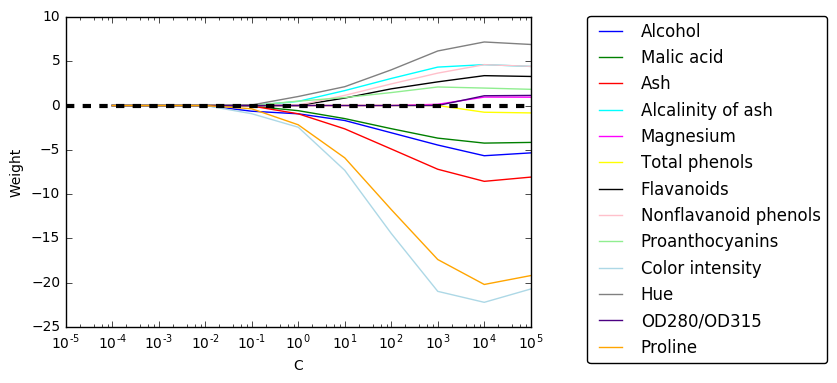

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)

for column, color, in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.ylabel('Weight')
plt.xlim([10**(-5), 10**5])
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()